In [1]:
#Import datasets
import pandas as pd 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from joblib import dump, load

In [2]:
#read_csv into file
df = pd.read_csv('full_features.csv')

df

,year_planted_grafted,age,yield_class,Daily_High,Daily _Low,Precipitation,year,month,day,color_BLACK,...,ranch_29,ranch_30,ranch_31,ranch_32,ranch_33,ranch_34,ranch_35,ranch_36,ranch_37,ranch_50
0,2009,6.0,high,94,68,0.0,2015,7,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,9.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,4.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
3,2011,4.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
4,2012,3.0,high,94,68,0.0,2015,7,13,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2010,8.0,high,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3362,2012,6.0,low,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3363,2017,1.0,low,74,39,0.0,2018,11,12,0,...,0,0,0,1,0,0,0,0,0,0
3364,2009,10.0,high,93,65,0.0,2019,7,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
#Drop unneccessary columns and rows with NAN and infinity values
#This set has NEITHER var_boxes or acres

#drop yield_class from dataset
X = df.drop('yield_class', axis=1)
y = df['yield_class']


# Define the pipeline
pipeline = Pipeline([
    ('replace_inf', SimpleImputer(strategy='median', missing_values=np.inf)),
    ('replace_nan', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scale_data', StandardScaler()),
    ('clf', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)


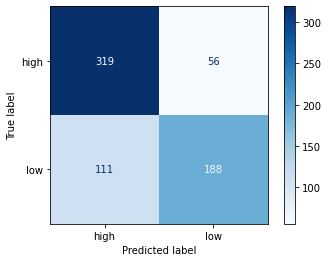

In [4]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [5]:
X = df.drop('yield_class', axis=1)
y = df['yield_class']

# Evaluate model using 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)

# Print average performance across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.07)


In [6]:
dump(pipeline, 'GB_model.pkl')

['GB_model.pkl']